In [1]:
!pip install kagglehub[pandas-datasets]

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


In [7]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "kartik2112/fraud-detection",
    "fraudTrain.csv"   # ✅ VALID CSV FILE
)

df.head()


Using Colab cache for faster access to the 'fraud-detection' dataset.


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
!ls /kaggle/input/fraud-detection


fraudTest.csv  fraudTrain.csv


In [9]:
df = df.drop(columns=[
    'trans_date_trans_time',
    'cc_num',
    'merchant',
    'first',
    'last',
    'street',
    'city',
    'state',
    'job',
    'dob',
    'trans_num'
], errors='ignore')


In [10]:
print("Dataset Shape:", df.shape)
df.info()


Dataset Shape: (1296675, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1296675 non-null  int64  
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   zip         1296675 non-null  int64  
 5   lat         1296675 non-null  float64
 6   long        1296675 non-null  float64
 7   city_pop    1296675 non-null  int64  
 8   unix_time   1296675 non-null  int64  
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 118.7+ MB


In [13]:
df.columns


Index(['Unnamed: 0', 'category', 'amt', 'gender', 'zip', 'lat', 'long',
       'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [14]:
df['is_fraud'].value_counts()


,count
is_fraud,
0,1289169
1,7506


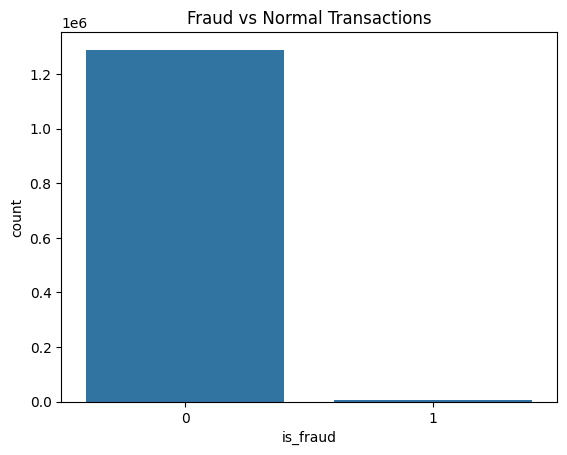

In [15]:
sns.countplot(x='is_fraud', data=df)
plt.title("Fraud vs Normal Transactions")
plt.show()


In [16]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


ValueError: could not convert string to float: 'misc_net'

In [19]:
X.dtypes

,0
Unnamed: 0,int64
category,object
amt,float64
gender,object
zip,int64
lat,float64
long,float64
city_pop,int64
unix_time,int64
merch_lat,float64


In [20]:
X_encoded = pd.get_dummies(X, drop_first=True)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class distribution after SMOTE:
is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42,
    stratify=y_resampled
)


In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=80,        # reduced (still enough)
    max_depth=15,           # limits tree growth
    min_samples_split=10,   # avoids overfitting
    random_state=42,
    n_jobs=1                # VERY IMPORTANT for Colab
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=80,
                       n_jobs=1, random_state=42)

In [27]:
y_pred = rf_model.predict(X_test)


In [28]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 97.16%


In [29]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97    257834
           1       0.99      0.96      0.97    257834

    accuracy                           0.97    515668
   macro avg       0.97      0.97      0.97    515668
weighted avg       0.97      0.97      0.97    515668



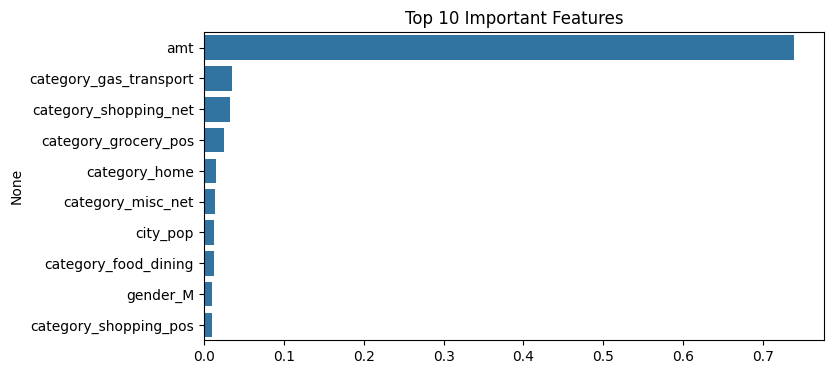

In [30]:
import numpy as np

feature_importance = rf_model.feature_importances_
indices = np.argsort(feature_importance)[::-1][:10]

top_features = X_encoded.columns[indices]

plt.figure(figsize=(8,4))
sns.barplot(x=feature_importance[indices], y=top_features)
plt.title("Top 10 Important Features")
plt.show()


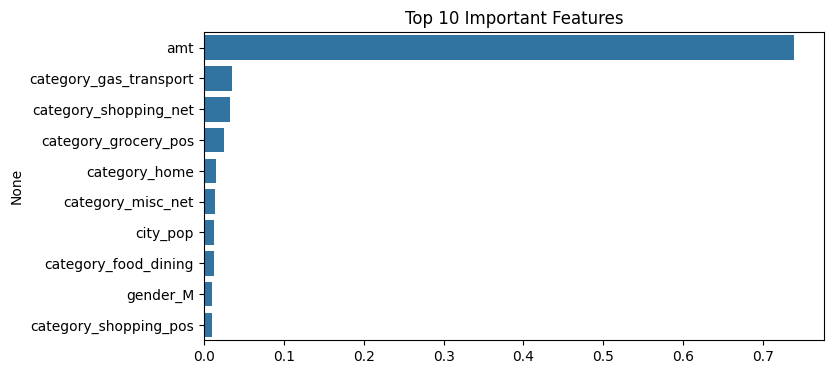

In [31]:
import numpy as np

feature_importance = rf_model.feature_importances_
indices = np.argsort(feature_importance)[::-1][:10]

top_features = X_encoded.columns[indices]

plt.figure(figsize=(8,4))
sns.barplot(x=feature_importance[indices], y=top_features)
plt.title("Top 10 Important Features")
plt.show()


In [32]:
sample = X_test[0].reshape(1, -1)
prediction = rf_model.predict(sample)

if prediction[0] == 1:
    print("⚠️ Fraudulent Transaction Detected")
else:
    print("✅ Legitimate Transaction")


⚠️ Fraudulent Transaction Detected


In [33]:
import joblib

joblib.dump(rf_model, "fraud_detection_model.pkl")
print("Model saved successfully")


Model saved successfully
